UNet

In [1]:
!pip install git+https://github.com/qubvel/segmentation_models.git
!https://github.com/qubvel/segmentation_models.pytorch
!wget https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet34_imagenet_1000_no_top.h5


  Cloning https://github.com/qubvel/segmentation_models.git to c:\users\sreec\appdata\local\temp\pip-req-build-5n0gsfn3


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?
'https:' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
import scipy.io
from skimage.transform import resize
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
gc.collect()
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import segmentation_models_pytorch as smp
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.metrics import iou_score
from segmentation_models_pytorch import Unet
from tensorflow import keras
smp.framework = smp.FPN
smp.framework()

FPN(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
import os, glob,  cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from keras.callbacks import Callback
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from skimage.transform import resize

Data preprocess

In [5]:
images_folder = 'Images'
masks_folder = 'Masks'

In [8]:
list_image_name = os.listdir(images_folder)
list_masks_name = os.listdir(masks_folder)

print(list_image_name)
print(len(list_image_name))

print(list_masks_name)
print(len(list_masks_name))

['0.png', '1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png', '1007.png', '1008.png', '1009.png', '101.png', '1010.png', '1011.png', '1012.png', '1013.png', '1014.png', '1015.png', '1016.png', '1017.png', '1018.png', '1019.png', '102.png', '1020.png', '1021.png', '1022.png', '1023.png', '1024.png', '1025.png', '1026.png', '1027.png', '1028.png', '1029.png', '103.png', '1030.png', '1031.png', '1032.png', '1033.png', '1034.png', '1035.png', '1036.png', '1037.png', '1038.png', '1039.png', '104.png', '1040.png', '1041.png', '1042.png', '1043.png', '1044.png', '1045.png', '1046.png', '1047.png', '1048.png', '1049.png', '105.png', '1050.png', '1051.png', '1052.png', '1053.png', '1054.png', '1055.png', '1056.png', '1057.png', '1058.png', '1059.png', '106.png', '1060.png', '1061.png', '1062.png', '1063.png', '1064.png', '1065.png', '1066.png', '1067.png', '1068.png', '1069.png', '107.png', '1070.png', '1071.png', '1072.png', '1073.p

In [9]:
def load_path(imgs_dir, masks_dir):
  images = []
  masks = []

  for file in os.listdir(images_folder):
    images.append(os.path.join(images_folder, file))

  for file in os.listdir(masks_folder):
    masks.append(os.path.join(masks_folder, file))

  return images, masks

In [10]:
list_images_paths, list_masks_paths = load_path(images_folder, masks_folder)

In [11]:
list_images_paths.sort()
print(list_images_paths)
print(len(list_images_paths))

list_masks_paths.sort()
print(list_masks_paths)
print(len(list_masks_paths))

['Images\\0.png', 'Images\\1.png', 'Images\\10.png', 'Images\\100.png', 'Images\\1000.png', 'Images\\1001.png', 'Images\\1002.png', 'Images\\1003.png', 'Images\\1004.png', 'Images\\1005.png', 'Images\\1006.png', 'Images\\1007.png', 'Images\\1008.png', 'Images\\1009.png', 'Images\\101.png', 'Images\\1010.png', 'Images\\1011.png', 'Images\\1012.png', 'Images\\1013.png', 'Images\\1014.png', 'Images\\1015.png', 'Images\\1016.png', 'Images\\1017.png', 'Images\\1018.png', 'Images\\1019.png', 'Images\\102.png', 'Images\\1020.png', 'Images\\1021.png', 'Images\\1022.png', 'Images\\1023.png', 'Images\\1024.png', 'Images\\1025.png', 'Images\\1026.png', 'Images\\1027.png', 'Images\\1028.png', 'Images\\1029.png', 'Images\\103.png', 'Images\\1030.png', 'Images\\1031.png', 'Images\\1032.png', 'Images\\1033.png', 'Images\\1034.png', 'Images\\1035.png', 'Images\\1036.png', 'Images\\1037.png', 'Images\\1038.png', 'Images\\1039.png', 'Images\\104.png', 'Images\\1040.png', 'Images\\1041.png', 'Images\\104

In [12]:
from PIL import Image
import tifffile
def show_img_with_mask(idx, images, masks):
    img = plt.imread(images[idx])
    mask = tifffile.imread(masks[idx])
    mask = np.stack((mask, mask, mask), axis=-1)
    pair = np.concatenate((img, mask), axis=1)
    plt.figure(figsize=(15,20))
    plt.imshow(pair)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


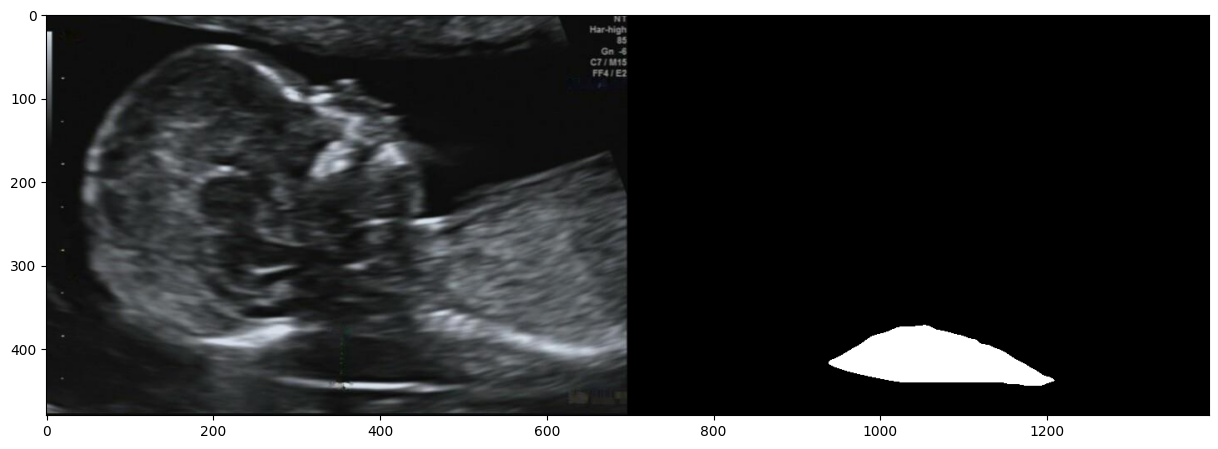

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


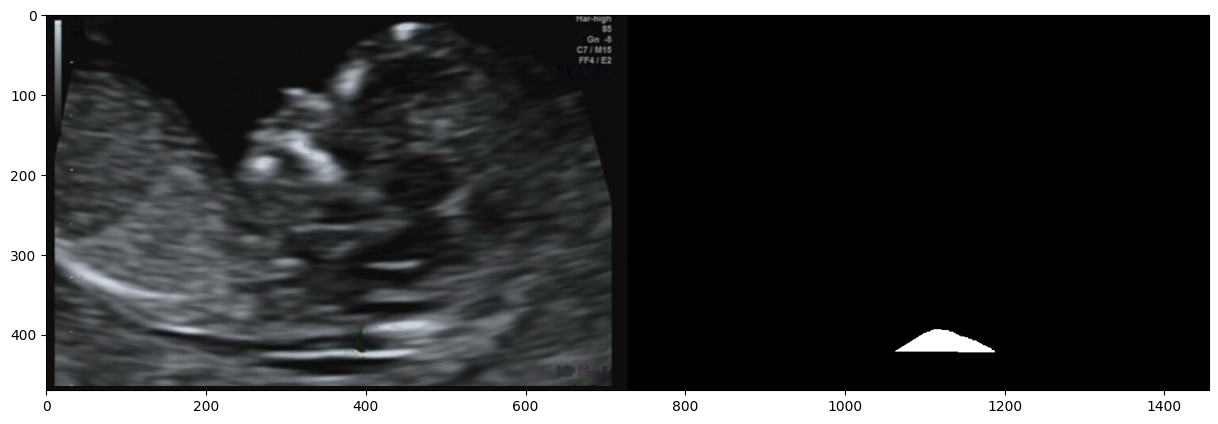

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


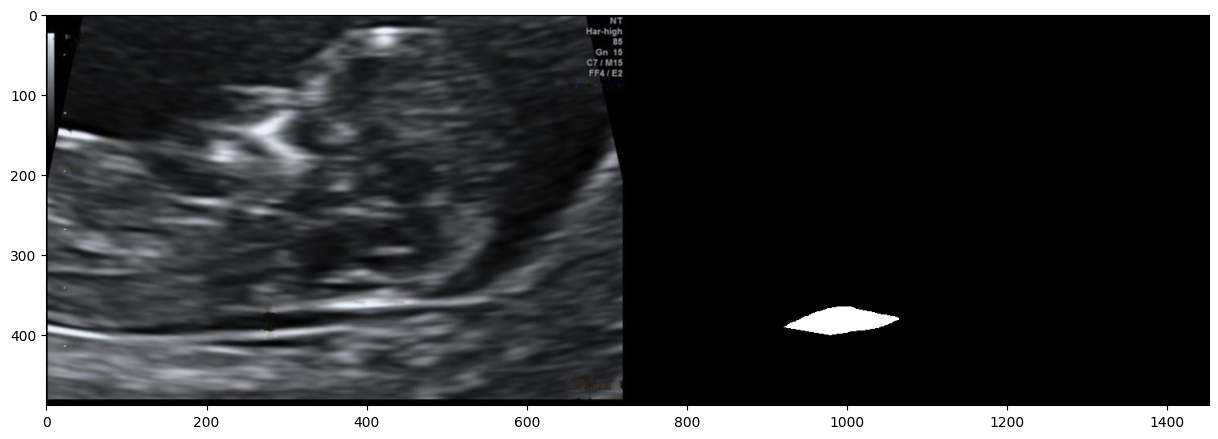

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


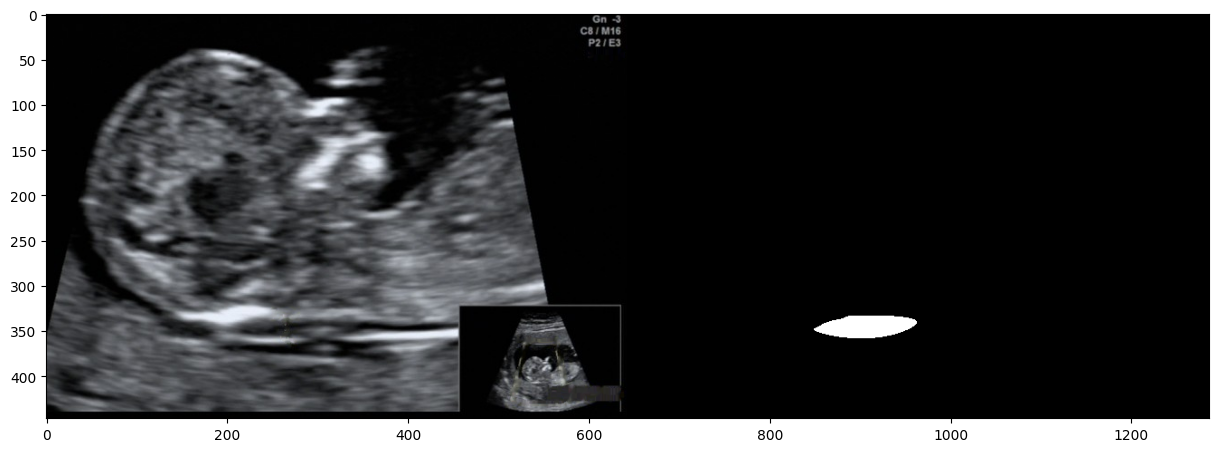

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


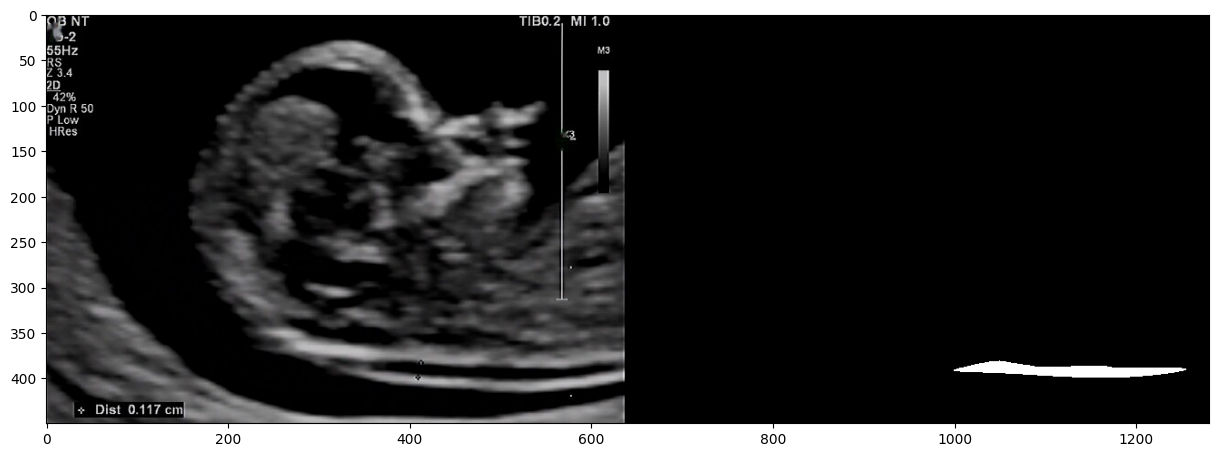

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


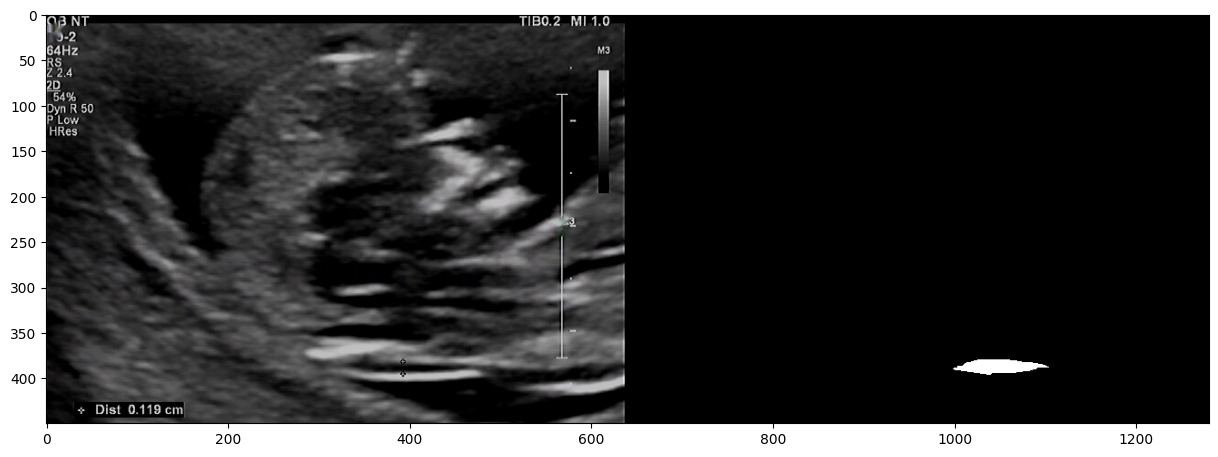

In [13]:
for i in range(6):
    show_img_with_mask(i, list_images_paths, list_masks_paths)

In [14]:
train_image_paths, test_image_paths = train_test_split(list_images_paths, test_size=0.2, random_state=42)

print(train_image_paths)
print(len(train_image_paths))

print(test_image_paths)
print(len(test_image_paths))

['Images\\988.png', 'Images\\146.png', 'Images\\1144.png', 'Images\\542.png', 'Images\\325.png', 'Images\\1237.png', 'Images\\1130.png', 'Images\\337.png', 'Images\\170.png', 'Images\\154.png', 'Images\\748.png', 'Images\\1273.png', 'Images\\1170.png', 'Images\\1276.png', 'Images\\359.png', 'Images\\1054.png', 'Images\\519.png', 'Images\\991.png', 'Images\\62.png', 'Images\\907.png', 'Images\\629.png', 'Images\\501.png', 'Images\\34.png', 'Images\\453.png', 'Images\\1621.png', 'Images\\1194.png', 'Images\\1534.png', 'Images\\1255.png', 'Images\\1432.png', 'Images\\700.png', 'Images\\1371.png', 'Images\\1322.png', 'Images\\1502.png', 'Images\\9.png', 'Images\\503.png', 'Images\\726.png', 'Images\\893.png', 'Images\\689.png', 'Images\\18.png', 'Images\\507.png', 'Images\\732.png', 'Images\\483.png', 'Images\\568.png', 'Images\\1515.png', 'Images\\877.png', 'Images\\821.png', 'Images\\46.png', 'Images\\895.png', 'Images\\947.png', 'Images\\316.png', 'Images\\185.png', 'Images\\912.png', '

In [15]:
def get_masks_corres(images_list):
    masks_list = []
    for image_path in images_list:
        components = image_path.split('\\')
        images_index = components.index('Images')
        components[images_index] = 'Masks'
        mask_path = '\\'.join(components).replace('.png', '.tif')
        masks_list.append(mask_path)
    return masks_list


In [16]:
def get_masks_corres(images_list):
    mask_paths = []
    for image_path in images_list:
        components = image_path.split('\\')
        if 'Images' in components:
            images_index = components.index('Images')
            components[images_index] = 'Masks'
            mask_path = '\\'.join(components).replace('.png', '.tif')
            mask_paths.append(mask_path)
        else:
            # Handle the case when 'Images' is not in the list
            print(f"'Images' not found in {image_path}")

    return mask_paths

# Example usage
train_mask_paths = get_masks_corres(train_image_paths)
test_mask_paths = get_masks_corres(test_image_paths)

print(train_image_paths)
print(train_mask_paths)
print(len(train_mask_paths))

print(test_image_paths)
print(test_mask_paths)
print(len(test_mask_paths))


['Images\\988.png', 'Images\\146.png', 'Images\\1144.png', 'Images\\542.png', 'Images\\325.png', 'Images\\1237.png', 'Images\\1130.png', 'Images\\337.png', 'Images\\170.png', 'Images\\154.png', 'Images\\748.png', 'Images\\1273.png', 'Images\\1170.png', 'Images\\1276.png', 'Images\\359.png', 'Images\\1054.png', 'Images\\519.png', 'Images\\991.png', 'Images\\62.png', 'Images\\907.png', 'Images\\629.png', 'Images\\501.png', 'Images\\34.png', 'Images\\453.png', 'Images\\1621.png', 'Images\\1194.png', 'Images\\1534.png', 'Images\\1255.png', 'Images\\1432.png', 'Images\\700.png', 'Images\\1371.png', 'Images\\1322.png', 'Images\\1502.png', 'Images\\9.png', 'Images\\503.png', 'Images\\726.png', 'Images\\893.png', 'Images\\689.png', 'Images\\18.png', 'Images\\507.png', 'Images\\732.png', 'Images\\483.png', 'Images\\568.png', 'Images\\1515.png', 'Images\\877.png', 'Images\\821.png', 'Images\\46.png', 'Images\\895.png', 'Images\\947.png', 'Images\\316.png', 'Images\\185.png', 'Images\\912.png', '

In [17]:
train_mask_paths = get_masks_corres(train_image_paths)
test_mask_paths = get_masks_corres(test_image_paths)

print(train_image_paths)
print(train_mask_paths)
print(len(train_mask_paths))

print(test_image_paths)
print(test_mask_paths)
print(len(test_mask_paths))

['Images\\988.png', 'Images\\146.png', 'Images\\1144.png', 'Images\\542.png', 'Images\\325.png', 'Images\\1237.png', 'Images\\1130.png', 'Images\\337.png', 'Images\\170.png', 'Images\\154.png', 'Images\\748.png', 'Images\\1273.png', 'Images\\1170.png', 'Images\\1276.png', 'Images\\359.png', 'Images\\1054.png', 'Images\\519.png', 'Images\\991.png', 'Images\\62.png', 'Images\\907.png', 'Images\\629.png', 'Images\\501.png', 'Images\\34.png', 'Images\\453.png', 'Images\\1621.png', 'Images\\1194.png', 'Images\\1534.png', 'Images\\1255.png', 'Images\\1432.png', 'Images\\700.png', 'Images\\1371.png', 'Images\\1322.png', 'Images\\1502.png', 'Images\\9.png', 'Images\\503.png', 'Images\\726.png', 'Images\\893.png', 'Images\\689.png', 'Images\\18.png', 'Images\\507.png', 'Images\\732.png', 'Images\\483.png', 'Images\\568.png', 'Images\\1515.png', 'Images\\877.png', 'Images\\821.png', 'Images\\46.png', 'Images\\895.png', 'Images\\947.png', 'Images\\316.png', 'Images\\185.png', 'Images\\912.png', '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


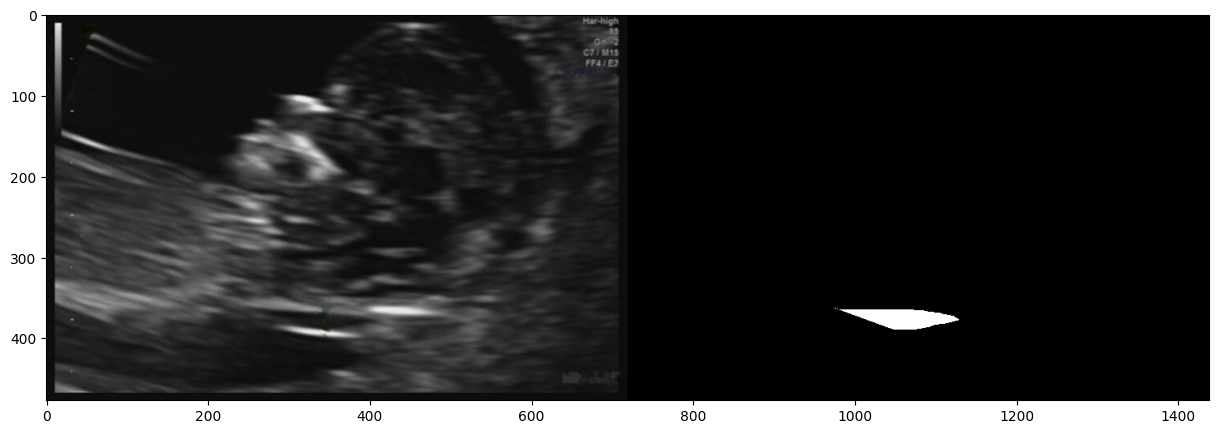

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


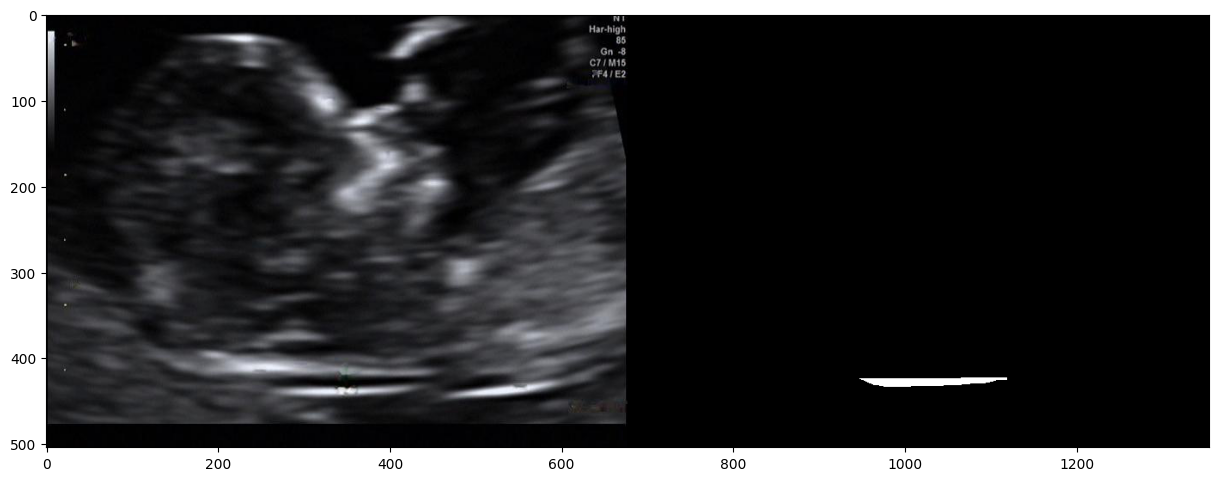

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


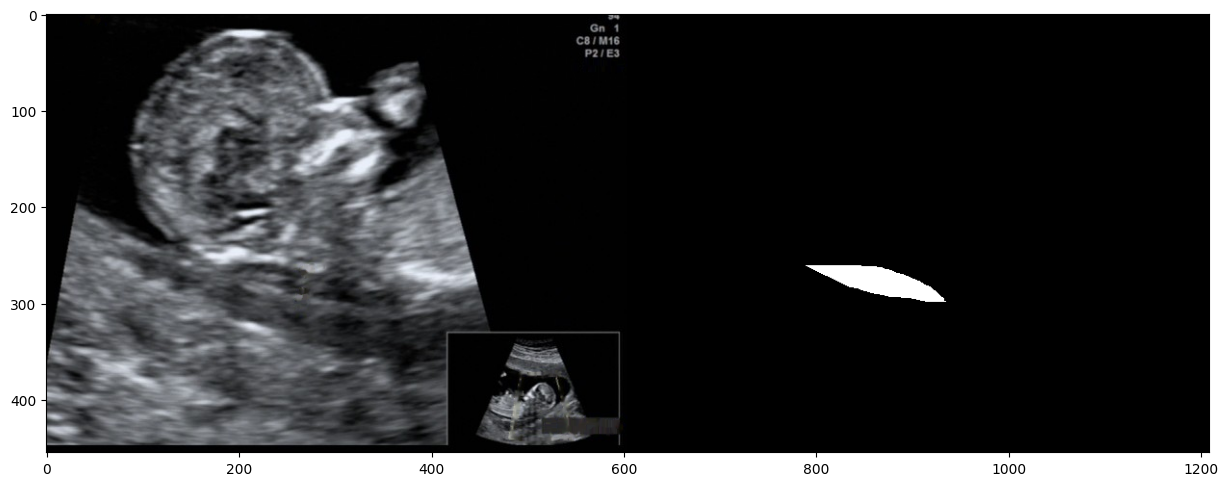

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


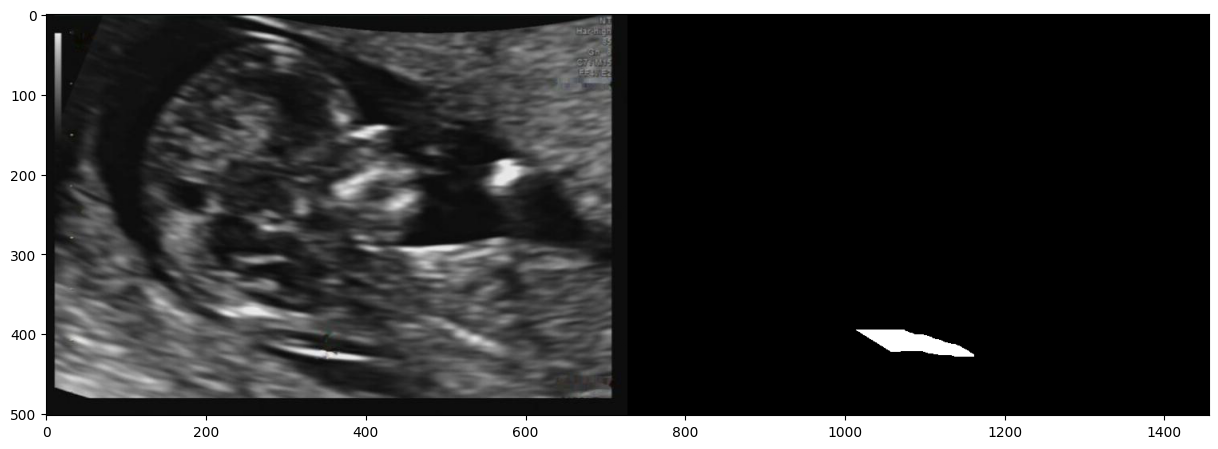

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


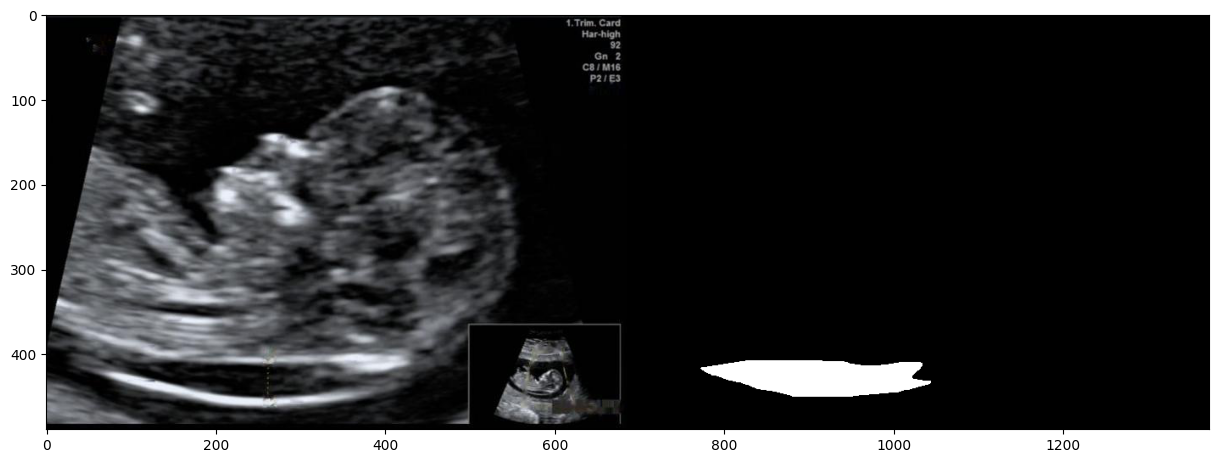

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


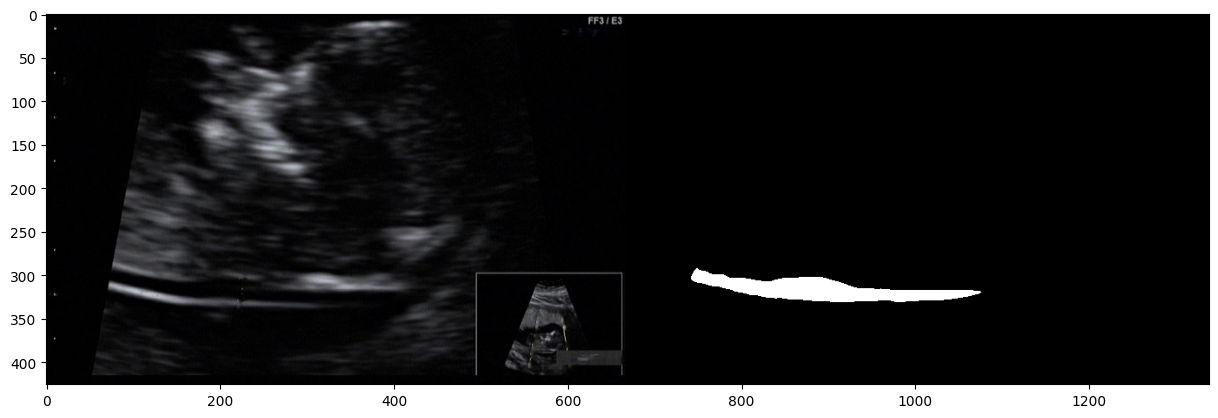

In [18]:
for i in range(6):
    show_img_with_mask(i, train_image_paths, train_mask_paths)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


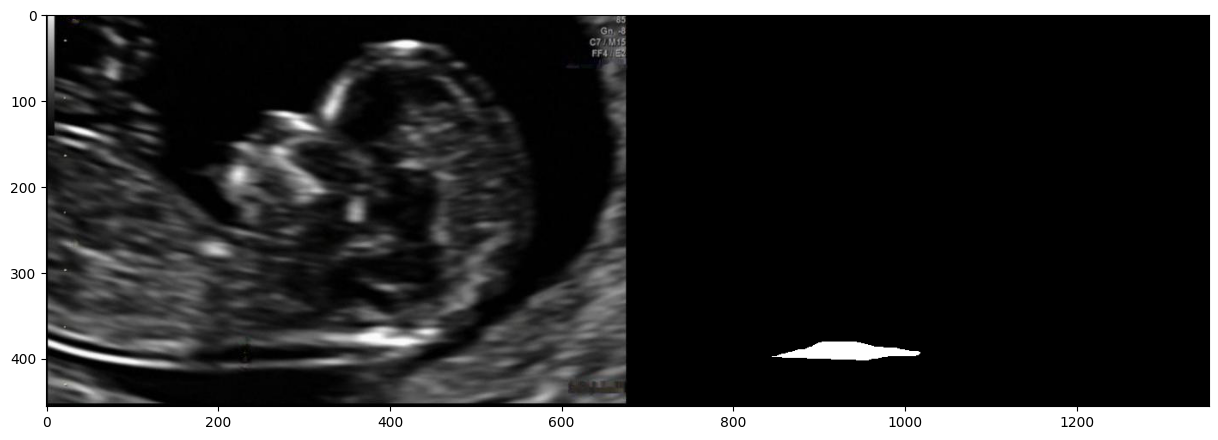

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


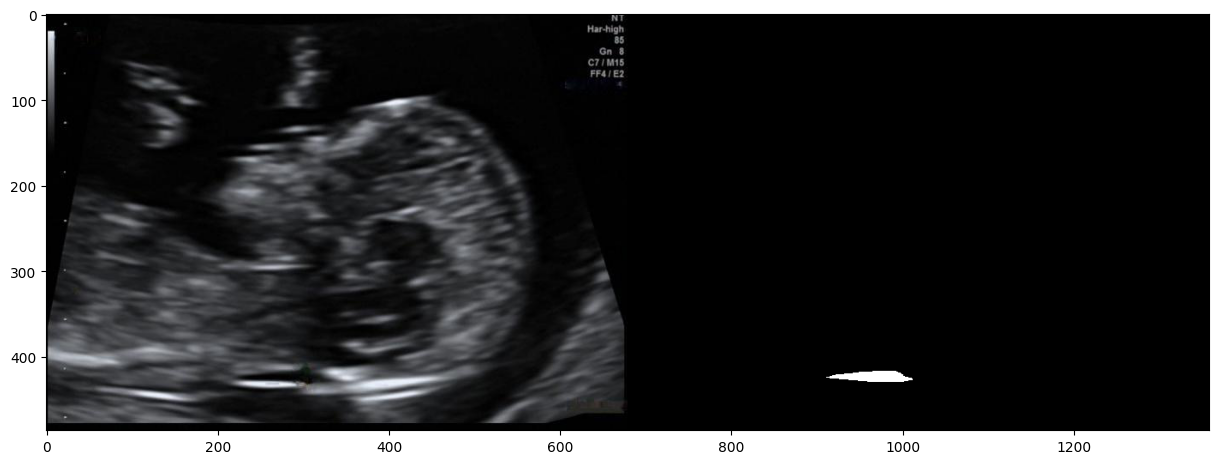

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


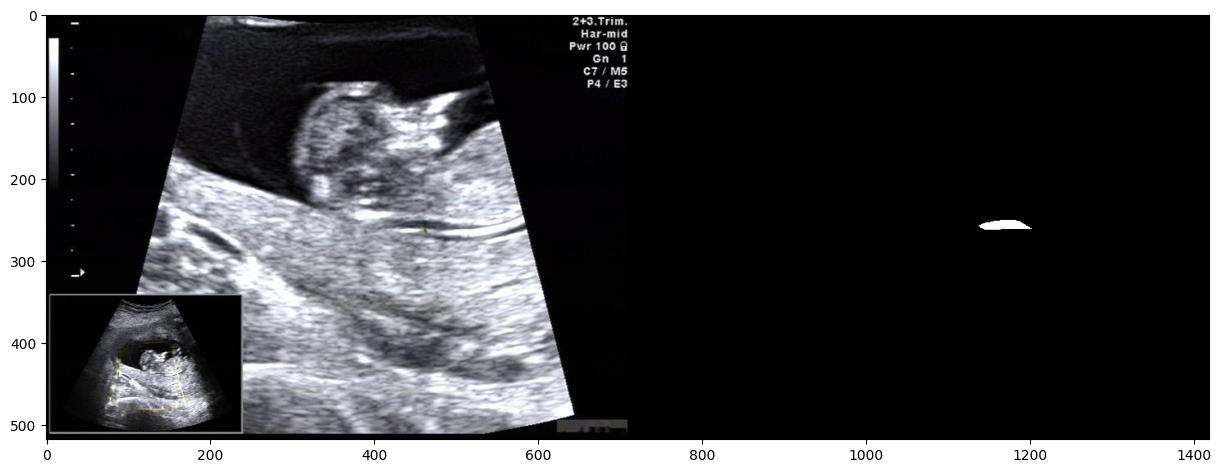

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


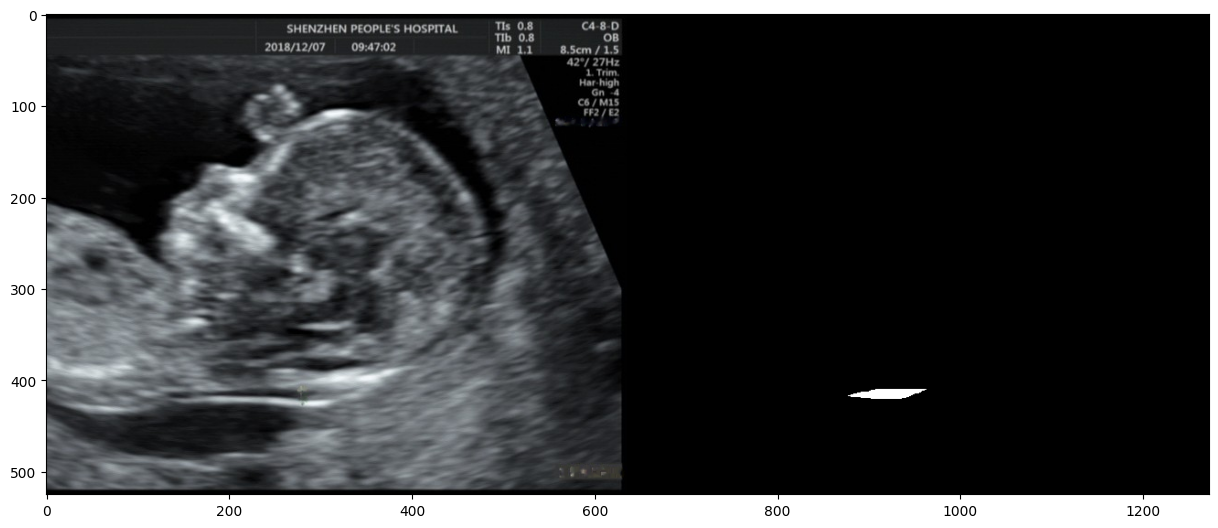

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


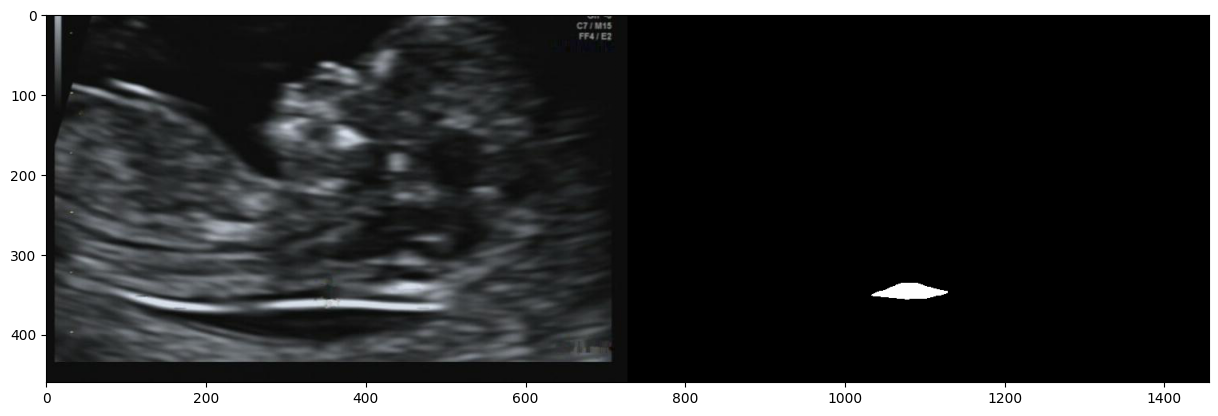

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


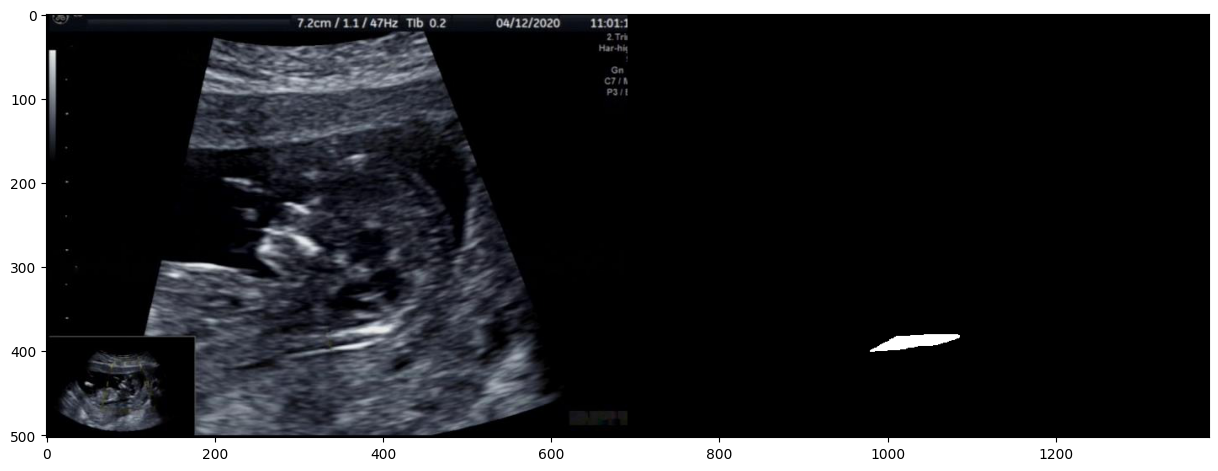

In [19]:
for i in range(6):
    show_img_with_mask(i, test_image_paths, test_mask_paths)

In [20]:
# Raw Image Size
IMAGE_ROWS = 420
IMAGE_COLS = 580

# Downsized Image Size
MIN_ROWS = 96
MIN_COLS = 96

train_images = train_image_paths
train_mask = train_mask_paths
test_images =  test_image_paths
test_mask = test_mask_paths

TRAIN_COUNT = len(train_images)
TEST_COUNT =  len(test_images)

print(TRAIN_COUNT)
print(TEST_COUNT)

1347
337


In [21]:
dim = (IMAGE_COLS, IMAGE_ROWS)
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return img

In [22]:
def read_train():

    train = np.ndarray((TRAIN_COUNT, 1, IMAGE_ROWS, IMAGE_COLS), dtype=np.uint8)
    masks = np.ndarray((TRAIN_COUNT, 1, IMAGE_ROWS, IMAGE_COLS), dtype=np.uint8)

    print('Reading training images...')
    for i, img in enumerate(train_images):
      image = read_image(img)
      image = np.array([image])
      train[i] = image

    for i, img in enumerate(train_mask):
      mask = read_image(img)
      mask = np.array([image])
      masks[i] = mask

    np.save('imgs_train.npy', train)
    np.save('imgs_mask_train.npy', masks)

    print('Train data processed!')

In [23]:
def load_train():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train

In [24]:
def read_test():

    test = np.ndarray((TEST_COUNT, 1, IMAGE_ROWS, IMAGE_COLS), dtype=np.uint8)
    test_ids = np.ndarray((TEST_COUNT, ), dtype=np.int32)

    print('Reading test images...')

    for i, img in enumerate(test_images):
        image = read_image(img)
        image = np.array([image])
        test[i] = image

        image_id = int(float(img.split('/')[-1].split('.')[0].split('-')[1]))
        test_ids[i] = image_id

    np.save('imgs_test.npy', test)
    np.save('imgs_id_test.npy', test_ids)
    print('Test data processed!')

In [25]:
def load_test():
    imgs_test = np.load('imgs_test.npy')
    imgs_id_test = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id_test

In [26]:
# read_train()
# read_test()

In [27]:
def read_test():
    test = np.ndarray((TEST_COUNT, 1, IMAGE_ROWS, IMAGE_COLS), dtype=np.uint8)
    test_ids = np.ndarray((TEST_COUNT,), dtype=np.int32)

    print('Reading test images...')

    for i, img in enumerate(test_images):
        try:
            image_id = int(float(os.path.basename(img).split('.')[0]))
        except (ValueError, IndexError):
            print(f"Skipping file with unexpected format: {img}")
            continue
        try:
            image = read_image(img)
            image = np.array([image])
            test[i] = image
            test_ids[i] = image_id
        except Exception as e:
            print(f"Error loading image: {img}")
            print(f"Error details: {e}")
            continue

    np.save('imgs_test.npy', test)
    np.save('imgs_id_test.npy', test_ids)
    print('Test data processed!')

def load_test():
    imgs_test = np.load('imgs_test.npy')
    imgs_id_test = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id_test

read_train()
read_test()


Reading training images...


Train data processed!
Reading test images...
Test data processed!


In [28]:
dt_train, dt_train_masks = load_train()
dt_test, dt_test_ids = load_test()

print(dt_train.shape)
print(dt_train_masks.shape)
print(dt_test.shape)
print(dt_test_ids.shape)

(1347, 1, 420, 580)
(1347, 1, 420, 580)
(337, 1, 420, 580)
(337,)


In [29]:
def preprocess(imgs, sonogram=True):
    processed_images = np.ndarray((imgs.shape[0], imgs.shape[1], MIN_ROWS, MIN_COLS), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        img = imgs[i, 0]
        if(sonogram):
            img = cv2.GaussianBlur(img,(7,7),0)
            img = cv2.equalizeHist(img)
        processed_images[i, 0] = cv2.resize(img, (MIN_COLS, MIN_ROWS), interpolation=cv2.INTER_CUBIC)
    processed_images = processed_images.astype('float32') # Float 32 for GPU usage
    return processed_images

In [30]:
print(dt_train.shape)

(1347, 1, 420, 580)


In [31]:
train = preprocess(dt_train)
print ("Train Data Shape: {}".format(train.shape))

masks = preprocess(dt_train_masks, sonogram=False)
masks /= 255.0 # converts all mask pixels from 255 to 1
print ("Mask Labels Shape: {}".format(masks.shape))

test = preprocess(dt_test)
print ("Test Data Shape: {}".format(test.shape))

Train Data Shape: (1347, 1, 96, 96)
Mask Labels Shape: (1347, 1, 96, 96)
Test Data Shape: (337, 1, 96, 96)


In [32]:
imgs_train = train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = masks.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]

In [33]:
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [34]:
def get_unet():
    input_img = Input((1, MIN_ROWS, MIN_COLS))

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=1)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=1)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=1)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=1)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=input_img, outputs=conv10)

    model.compile(optimizer=Adam(learning_rate=1e-5), loss=dice_coef_loss, metrics=['accuracy'])

    return model

model = get_unet()
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1, 96, 96)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 1, 96, 32)            27680     ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 1, 96, 32)            9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 1, 48, 32)            0         ['conv2d_1[0][0]']            
 D)                                                                                         

In [35]:
model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

In [36]:
# batch_size = 20
# epochs = 10
# model.fit(imgs_train, imgs_mask_train, batch_size=20, epochs=10,  verbose=1, shuffle=True, validation_split=0.1, callbacks=model_checkpoint)

UNet2

In [37]:
import os

# for reading and processing images
import imageio
from PIL import Image
import tifffile
import cv2

# for visualizations
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # for using np arrays
from numpy import asarray

# for bulding and running deep learning model
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split

In [38]:
images_folder = 'Images'
masks_folder = 'Masks'

In [39]:
list_image_name = os.listdir(images_folder)
list_masks_name = os.listdir(masks_folder)

print(list_image_name)
print(len(list_image_name))

print(list_masks_name)
print(len(list_masks_name))

['0.png', '1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png', '1007.png', '1008.png', '1009.png', '101.png', '1010.png', '1011.png', '1012.png', '1013.png', '1014.png', '1015.png', '1016.png', '1017.png', '1018.png', '1019.png', '102.png', '1020.png', '1021.png', '1022.png', '1023.png', '1024.png', '1025.png', '1026.png', '1027.png', '1028.png', '1029.png', '103.png', '1030.png', '1031.png', '1032.png', '1033.png', '1034.png', '1035.png', '1036.png', '1037.png', '1038.png', '1039.png', '104.png', '1040.png', '1041.png', '1042.png', '1043.png', '1044.png', '1045.png', '1046.png', '1047.png', '1048.png', '1049.png', '105.png', '1050.png', '1051.png', '1052.png', '1053.png', '1054.png', '1055.png', '1056.png', '1057.png', '1058.png', '1059.png', '106.png', '1060.png', '1061.png', '1062.png', '1063.png', '1064.png', '1065.png', '1066.png', '1067.png', '1068.png', '1069.png', '107.png', '1070.png', '1071.png', '1072.png', '1073.p

In [40]:
def load_path(imgs_dir, masks_dir):
  images = []
  masks = []

  for file in os.listdir(images_folder):
    images.append(os.path.join(images_folder, file))

  for file in os.listdir(masks_folder):
    masks.append(os.path.join(masks_folder, file))

  return images, masks

In [41]:
list_images_paths, list_masks_paths = load_path(images_folder, masks_folder)

In [42]:
list_images_paths.sort()
print(list_images_paths)
print(len(list_images_paths))

list_masks_paths.sort()
print(list_masks_paths)
print(len(list_masks_paths))

['Images\\0.png', 'Images\\1.png', 'Images\\10.png', 'Images\\100.png', 'Images\\1000.png', 'Images\\1001.png', 'Images\\1002.png', 'Images\\1003.png', 'Images\\1004.png', 'Images\\1005.png', 'Images\\1006.png', 'Images\\1007.png', 'Images\\1008.png', 'Images\\1009.png', 'Images\\101.png', 'Images\\1010.png', 'Images\\1011.png', 'Images\\1012.png', 'Images\\1013.png', 'Images\\1014.png', 'Images\\1015.png', 'Images\\1016.png', 'Images\\1017.png', 'Images\\1018.png', 'Images\\1019.png', 'Images\\102.png', 'Images\\1020.png', 'Images\\1021.png', 'Images\\1022.png', 'Images\\1023.png', 'Images\\1024.png', 'Images\\1025.png', 'Images\\1026.png', 'Images\\1027.png', 'Images\\1028.png', 'Images\\1029.png', 'Images\\103.png', 'Images\\1030.png', 'Images\\1031.png', 'Images\\1032.png', 'Images\\1033.png', 'Images\\1034.png', 'Images\\1035.png', 'Images\\1036.png', 'Images\\1037.png', 'Images\\1038.png', 'Images\\1039.png', 'Images\\104.png', 'Images\\1040.png', 'Images\\1041.png', 'Images\\104

In [43]:
from PIL import Image
import tifffile
def show_img_with_mask(idx, images, masks):
    img = plt.imread(images[idx])
    mask = tifffile.imread(masks[idx])
    mask = np.stack((mask, mask, mask), axis=-1)
    pair = np.concatenate((img, mask), axis=1)
    plt.figure(figsize=(15,20))
    plt.imshow(pair)
    plt.show()

In [44]:
train_image_paths, test_image_paths = train_test_split(list_images_paths, test_size=0.2, random_state=42)

print(train_image_paths)
print(len(train_image_paths))

print(test_image_paths)
print(len(test_image_paths))

['Images\\988.png', 'Images\\146.png', 'Images\\1144.png', 'Images\\542.png', 'Images\\325.png', 'Images\\1237.png', 'Images\\1130.png', 'Images\\337.png', 'Images\\170.png', 'Images\\154.png', 'Images\\748.png', 'Images\\1273.png', 'Images\\1170.png', 'Images\\1276.png', 'Images\\359.png', 'Images\\1054.png', 'Images\\519.png', 'Images\\991.png', 'Images\\62.png', 'Images\\907.png', 'Images\\629.png', 'Images\\501.png', 'Images\\34.png', 'Images\\453.png', 'Images\\1621.png', 'Images\\1194.png', 'Images\\1534.png', 'Images\\1255.png', 'Images\\1432.png', 'Images\\700.png', 'Images\\1371.png', 'Images\\1322.png', 'Images\\1502.png', 'Images\\9.png', 'Images\\503.png', 'Images\\726.png', 'Images\\893.png', 'Images\\689.png', 'Images\\18.png', 'Images\\507.png', 'Images\\732.png', 'Images\\483.png', 'Images\\568.png', 'Images\\1515.png', 'Images\\877.png', 'Images\\821.png', 'Images\\46.png', 'Images\\895.png', 'Images\\947.png', 'Images\\316.png', 'Images\\185.png', 'Images\\912.png', '

In [45]:
def get_masks_corres(images_list):
    masks_list = []
    for image_path in images_list:
        components = image_path.split('\\')
        images_index = components.index('Images')
        components[images_index] = 'Masks'
        mask_path = '\\'.join(components).replace('.png', '.tif')
        masks_list.append(mask_path)
    return masks_list


In [46]:
train_mask_paths = get_masks_corres(train_image_paths)
test_mask_paths = get_masks_corres(test_image_paths)

print(train_image_paths)
print(train_mask_paths)
print(len(train_mask_paths))

print(test_image_paths)
print(test_mask_paths)
print(len(test_mask_paths))

['Images\\988.png', 'Images\\146.png', 'Images\\1144.png', 'Images\\542.png', 'Images\\325.png', 'Images\\1237.png', 'Images\\1130.png', 'Images\\337.png', 'Images\\170.png', 'Images\\154.png', 'Images\\748.png', 'Images\\1273.png', 'Images\\1170.png', 'Images\\1276.png', 'Images\\359.png', 'Images\\1054.png', 'Images\\519.png', 'Images\\991.png', 'Images\\62.png', 'Images\\907.png', 'Images\\629.png', 'Images\\501.png', 'Images\\34.png', 'Images\\453.png', 'Images\\1621.png', 'Images\\1194.png', 'Images\\1534.png', 'Images\\1255.png', 'Images\\1432.png', 'Images\\700.png', 'Images\\1371.png', 'Images\\1322.png', 'Images\\1502.png', 'Images\\9.png', 'Images\\503.png', 'Images\\726.png', 'Images\\893.png', 'Images\\689.png', 'Images\\18.png', 'Images\\507.png', 'Images\\732.png', 'Images\\483.png', 'Images\\568.png', 'Images\\1515.png', 'Images\\877.png', 'Images\\821.png', 'Images\\46.png', 'Images\\895.png', 'Images\\947.png', 'Images\\316.png', 'Images\\185.png', 'Images\\912.png', '

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


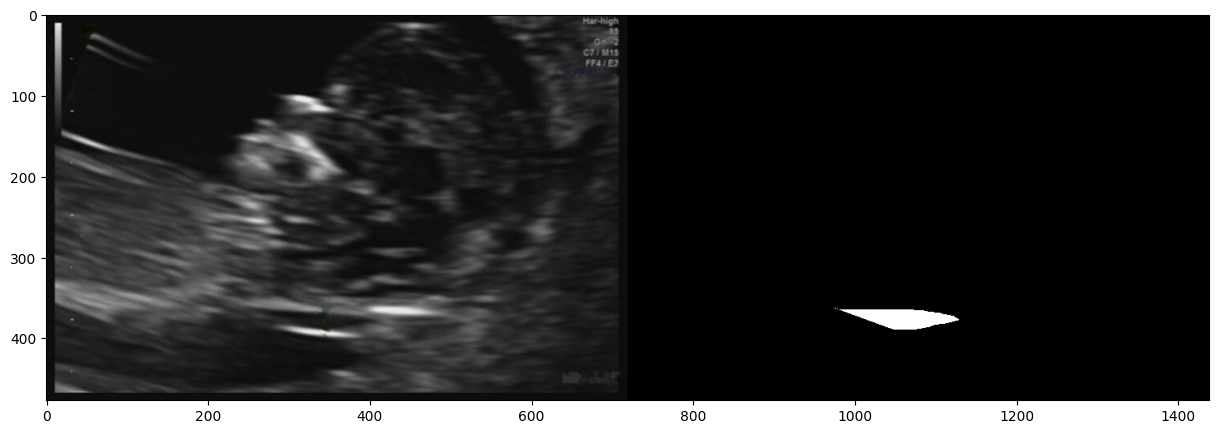

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


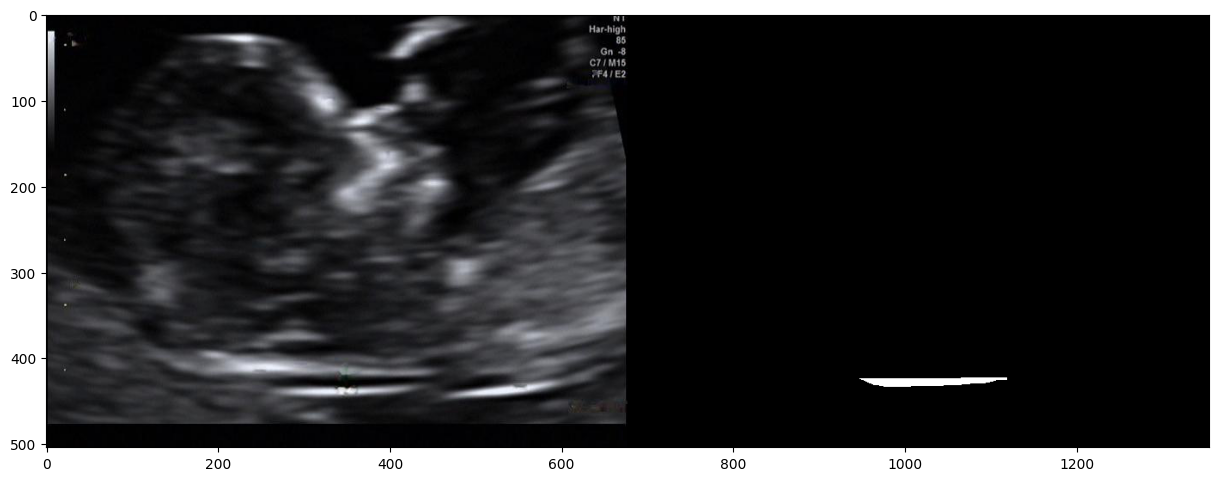

In [47]:
for i in range(2):
    show_img_with_mask(i, train_image_paths, train_mask_paths)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


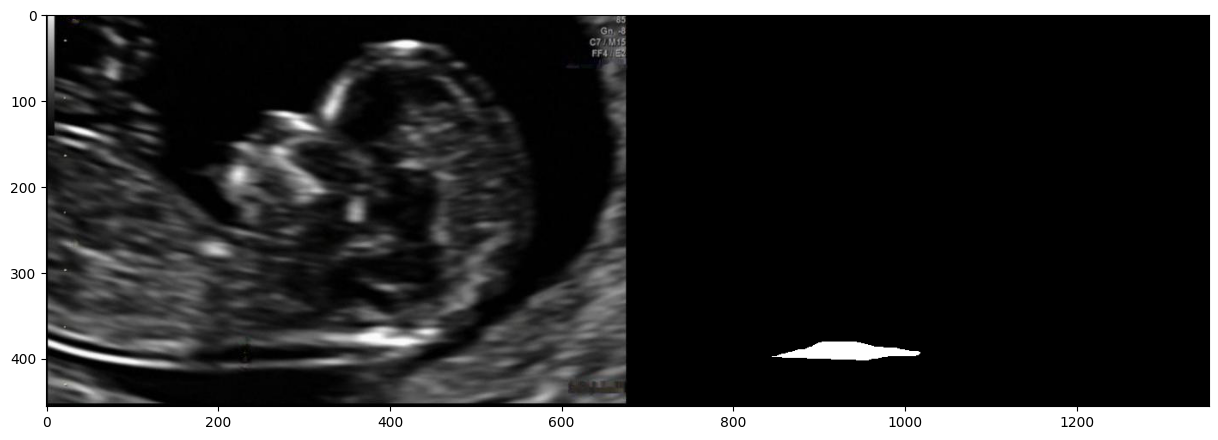

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


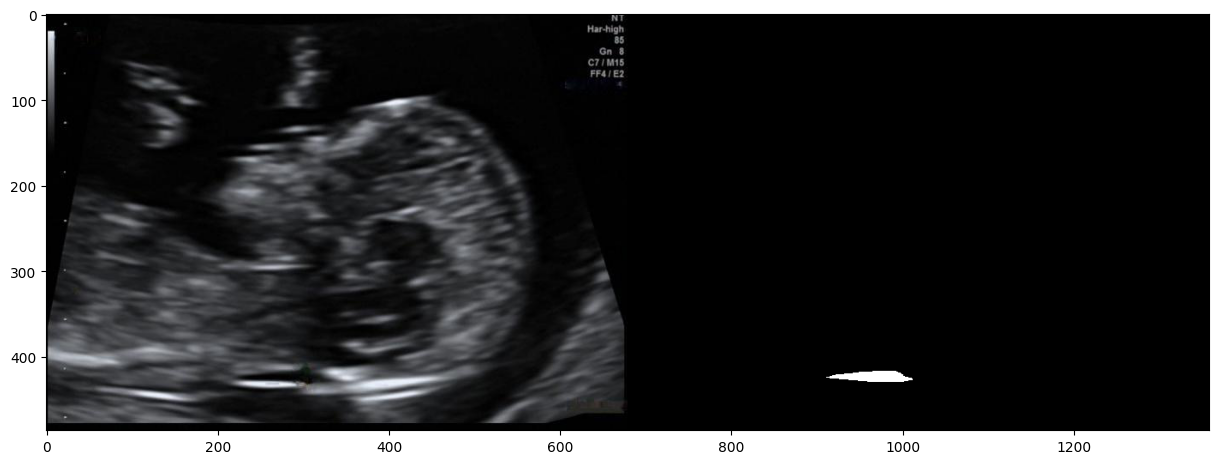

In [48]:
for i in range(2):
    show_img_with_mask(i, test_image_paths, test_mask_paths)

Preprocessing data

In [49]:
target_shape_img = [256, 256, 3]
target_shape_mask = [256, 256, 1]

In [50]:
def PreprocessData(image_list, mask_list, mode="train"):
    number_of_example = len(image_list)
    image_height, image_width, image_channels = target_shape_img
    mask_height, mask_width, mask_channels = target_shape_mask

    images = np.zeros((number_of_example, image_height, image_width, image_channels), dtype=np.float32)
    masks = np.zeros((number_of_example, mask_height, mask_width, mask_channels), dtype=np.int32)

    print('----------- Processing {0} images --------------'.format(mode))
    for (index, img) in enumerate(image_list):
        single_img = Image.open(img).convert('RGB')
        single_img = single_img.resize((image_height, image_width))
        single_img = np.reshape(single_img, (image_height, image_width, image_channels))
        single_img = single_img / 255.0  # Assuming the pixel values are in the range [0, 255]
        images[index] = single_img
    print('----------- Processing {0} images done! --------------'.format(mode))

    print('\n')

    print('----------- Processing {0} mask --------------'.format(mode))
    for (index, mask) in enumerate(mask_list):
        try:
            single_mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
            if single_mask is None or single_mask.size == 0:
                print(f"Error loading or empty mask image: {mask}")
                continue
            single_mask = cv2.resize(single_mask, dsize=(mask_height, mask_width), interpolation=cv2.INTER_NEAREST)
            single_mask = np.asarray(single_mask)
            single_mask = single_mask[..., tf.newaxis]
            single_mask = np.round(single_mask / 255)
            single_mask = single_mask.astype(int)
            masks[index] = single_mask
        except Exception as e:
            print(f"Error processing mask image: {mask}. {e}")
    print('----------- Processing {0} mask done! --------------'.format(mode))

    print('\n')

    return images, masks

In [51]:
# Process data using apt helper function
img_train, mask_train = PreprocessData(train_image_paths, train_mask_paths)
img_test, mask_test = PreprocessData(test_image_paths, test_mask_paths, "test")

# train
print("Train img Shape:", img_train.shape)
print("Train mask shape:", mask_train.shape)

# test
print("Test img Shape:", img_test.shape)
print("Mask img shape:", mask_test.shape)

# There are 2 classes
print(np.unique(mask_train))
print(np.unique(mask_test))

----------- Processing train images --------------
----------- Processing train images done! --------------


----------- Processing train mask --------------
----------- Processing train mask done! --------------


----------- Processing test images --------------
----------- Processing test images done! --------------


----------- Processing test mask --------------
----------- Processing test mask done! --------------


Train img Shape: (1347, 256, 256, 3)
Train mask shape: (1347, 256, 256, 1)
Test img Shape: (337, 256, 256, 3)
Mask img shape: (337, 256, 256, 1)
[0 1]
[0 1]


Text(0.5, 1.0, 'Processed Masked Image ')

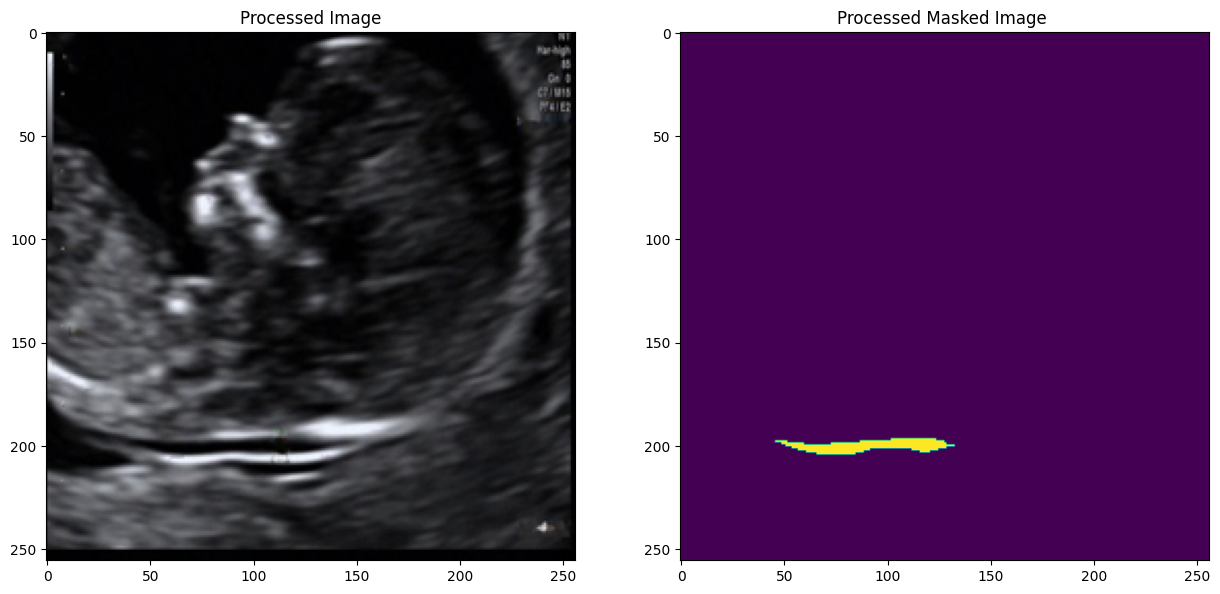

In [52]:
index_test = 145
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(img_train[index_test])
arr[0].set_title('Processed Image')
arr[1].imshow(mask_train[index_test, :, :, 0])
arr[1].set_title('Processed Masked Image ')

Text(0.5, 1.0, 'Processed Masked Image ')

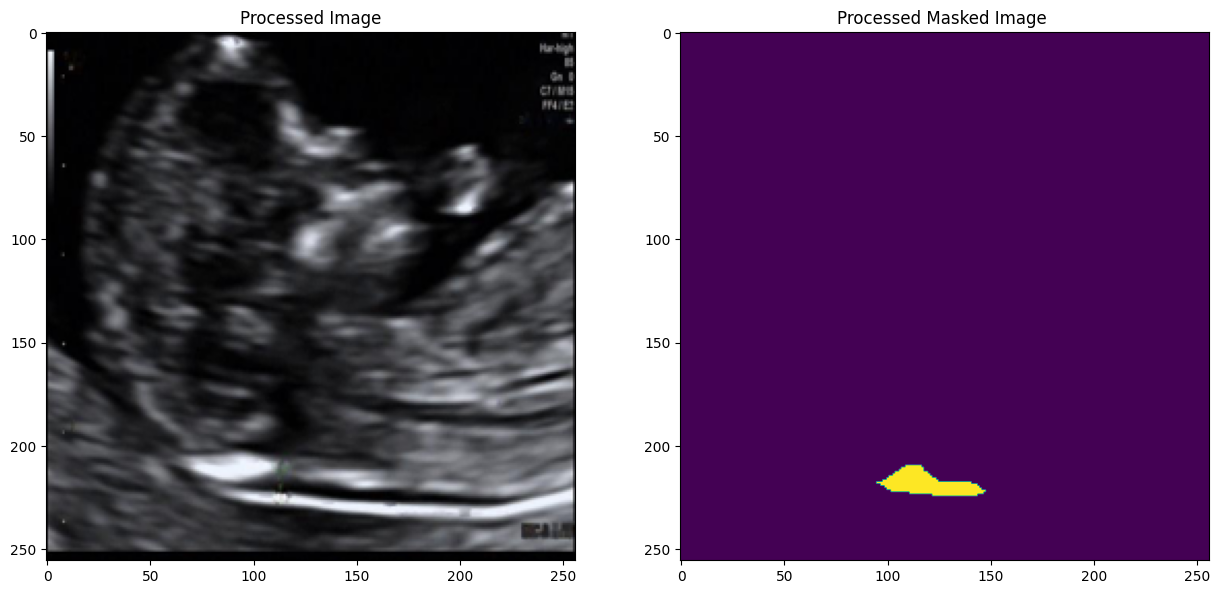

In [53]:
# Visualize the output
index_test = 10
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(img_test[index_test])
arr[0].set_title('Processed Image')
arr[1].imshow(mask_test[index_test][:, :, 0])
arr[1].set_title('Processed Masked Image ')

In [54]:
input_size = (256, 256, 3)
n_filters = 64
n_classes = 2

In [55]:
def EncoderChildBlock(inputs, n_filters=n_filters, dropout_prob=0.3, max_pooling=True):
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(inputs)
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(conv)
    conv = BatchNormalization()(conv, training=False)
    if dropout_prob > 0:
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)
    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size = (2, 2))(conv)
    else:
        next_layer = conv
    skip_connection = conv

    return next_layer, skip_connection

In [56]:
def DecoderChildBlock(prev_layer_input, skip_layer_input, n_filters=n_filters):
    up = Conv2DTranspose(n_filters, (3, 3), strides=(2, 2), padding='same')(prev_layer_input)
    merge = concatenate([up, skip_layer_input], axis=3)

    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(merge)
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(conv)
    return conv

In [57]:
def UNetCompiled(input_size=input_size, n_filters=n_filters, n_classes=n_classes):

    inputs = Input(input_size)
    cblock1 = EncoderChildBlock(inputs, n_filters,dropout_prob=0, max_pooling=True)
    cblock2 = EncoderChildBlock(cblock1[0], n_filters*2, dropout_prob=0.3, max_pooling=True)
    cblock3 = EncoderChildBlock(cblock2[0], n_filters*4, dropout_prob=0.3, max_pooling=True)
    cblock4 = EncoderChildBlock(cblock3[0], n_filters*8, dropout_prob=0.3, max_pooling=True)
    cblock5 = EncoderChildBlock(cblock4[0], n_filters*16, dropout_prob=0.3, max_pooling=False)
    ublock6 = DecoderChildBlock(cblock5[0], cblock4[1], n_filters*8)
    ublock7 = DecoderChildBlock(ublock6, cblock3[1], n_filters*4)
    ublock8 = DecoderChildBlock(ublock7, cblock2[1], n_filters*2)
    ublock9 = DecoderChildBlock(ublock8, cblock1[1], n_filters)
    conv9 = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(ublock9)
    conv10 = Conv2D(n_classes, 1, padding='same')(conv9)
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [58]:
X_train, X_valid, y_train, y_valid = img_train, img_test, mask_train, mask_test

# Compile the model
unet = UNetCompiled()

# Check the summary
unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_19[0][0]']           
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d_20[0][0]']           
 Normalization)                                                                             

In [59]:
model_size = unet.count_params()
print("Model Size:", model_size)

Model Size: 34558274


In [60]:
'''model_size = unet.count_params()
data_type_size = 4  # Assuming 32-bit floating point (4 bytes)
available_memory = 10 * 1024**3  # 12GB in bytes
batch_size = available_memory // (model_size * data_type_size)

batch_size = min(batch_size, 32)
epochs = 50
optimizer = Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
unet.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
# Run
results = unet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))'''

"model_size = unet.count_params()\ndata_type_size = 4  # Assuming 32-bit floating point (4 bytes)\navailable_memory = 10 * 1024**3  # 12GB in bytes\nbatch_size = available_memory // (model_size * data_type_size)\n\nbatch_size = min(batch_size, 32)\nepochs = 50\noptimizer = Adam(learning_rate=1e-5)\nloss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)\nunet.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])\n# Run\nresults = unet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))"

In [64]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
batch_size = 16
epochs = 10
optimizer = Adam(learning_rate=1e-5)

# CrossEntropyLoss.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
unet.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
# Run
results = unet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

Epoch 1/10


85/85 [==============================] - 4635s 54s/step - loss: 0.1517 - accuracy: 0.9872 - val_loss: 0.1112 - val_accuracy: 0.9943
Epoch 2/10
85/85 [==============================] - 5182s 61s/step - loss: 0.0352 - accuracy: 0.9937 - val_loss: 0.0418 - val_accuracy: 0.9944
Epoch 3/10
85/85 [==============================] - 5301s 62s/step - loss: 0.0249 - accuracy: 0.9937 - val_loss: 0.0310 - val_accuracy: 0.9944
Epoch 4/10
85/85 [==============================] - 4816s 57s/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0.0569 - val_accuracy: 0.9944
Epoch 5/10
85/85 [==============================] - 5219s 62s/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0307 - val_accuracy: 0.9945
Epoch 6/10
85/85 [==============================] - 5301s 62s/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0272 - val_accuracy: 0.9946
Epoch 7/10
85/85 [==============================] - 5415s 64s/step - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.0319 - val_accuracy: 0.99

In [65]:
unet.save('unet-8-256x256-28Jan-99%.h5')

In [62]:
def unet_predict(index_of_test):
  img = img_test[index_of_test][np.newaxis, ...]
  pred_y = unet.predict(img)
  pred_mask = tf.argmax(pred_y[0], axis=-1)
  return pred_mask

1/1 [==============================] - 1s 666ms/step


Text(0.5, 1.0, 'Processed predict mask ')

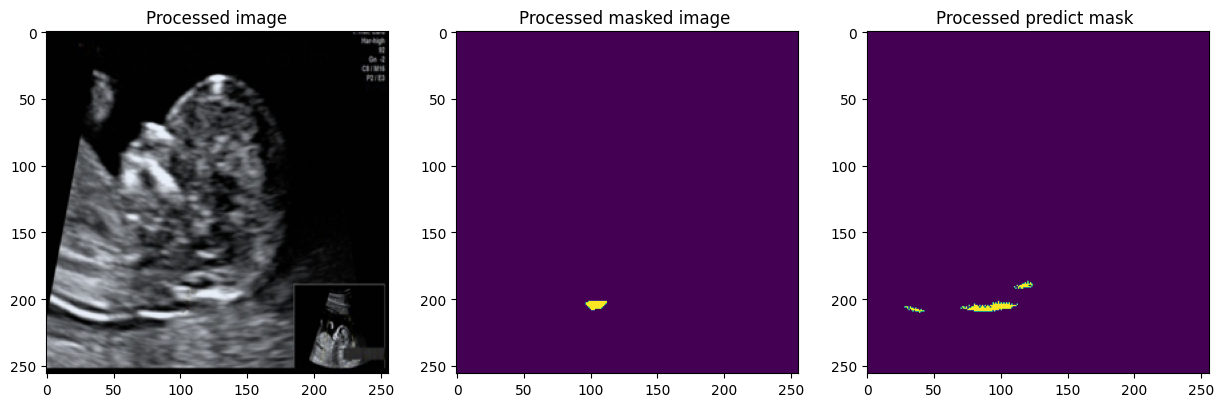

In [67]:
index_test = 160
pred_mask = unet_predict(index_test)

_, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(img_test[index_test])
arr[0].set_title('Processed image')
arr[1].imshow(mask_test[index_test][:, :, 0])
arr[1].set_title('Processed masked image ')
arr[2].imshow(pred_mask)
arr[2].set_title('Processed predict mask ')

Predictions for YOLO Model values

1/1 [==============================] - 1s 1s/step


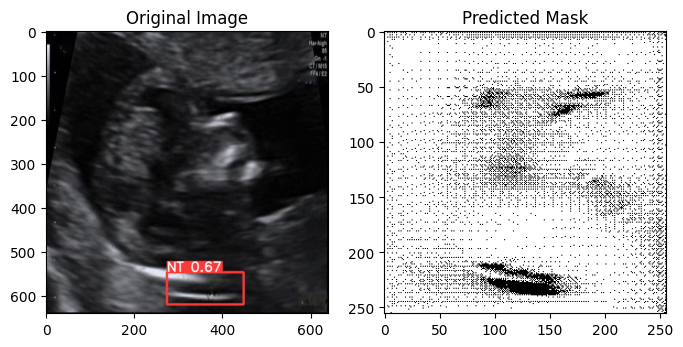

1/1 [==============================] - 1s 622ms/step


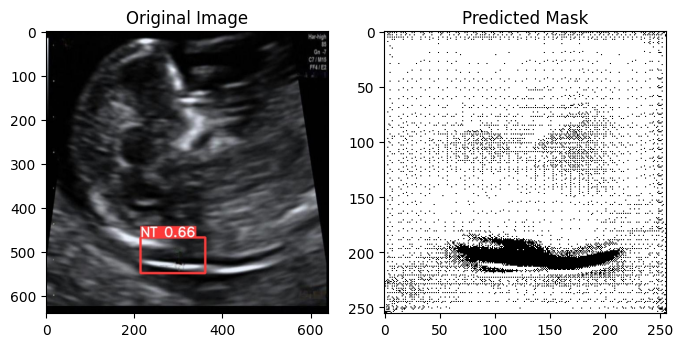

1/1 [==============================] - 1s 599ms/step


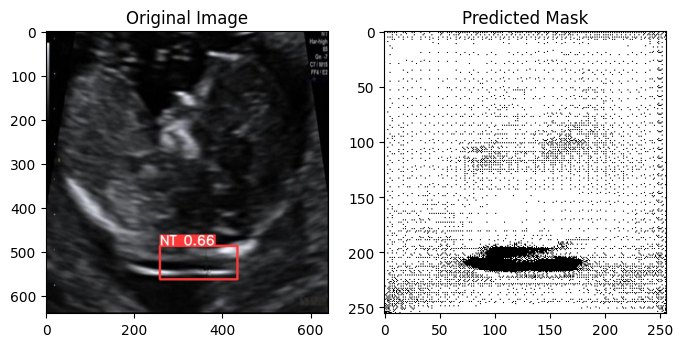

1/1 [==============================] - 1s 525ms/step


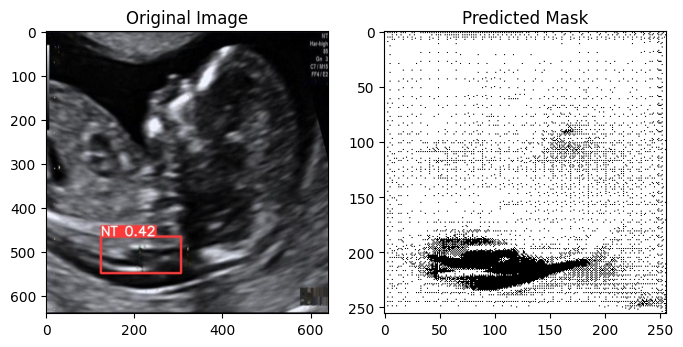

1/1 [==============================] - 1s 587ms/step


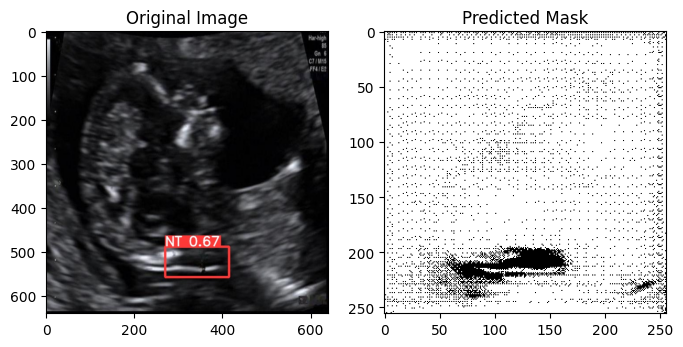

1/1 [==============================] - 1s 633ms/step


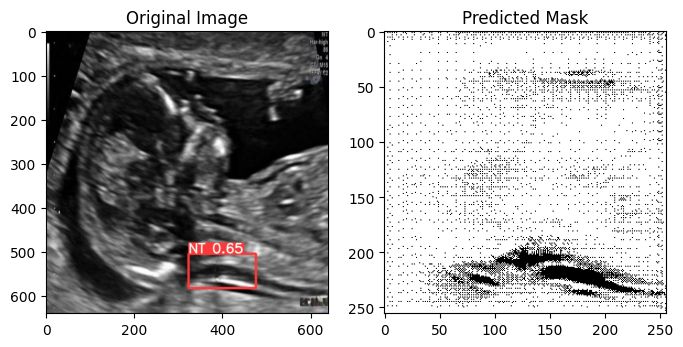

1/1 [==============================] - 1s 519ms/step


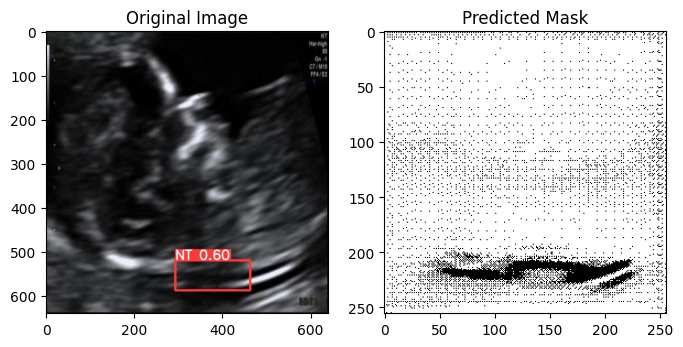

1/1 [==============================] - 1s 556ms/step


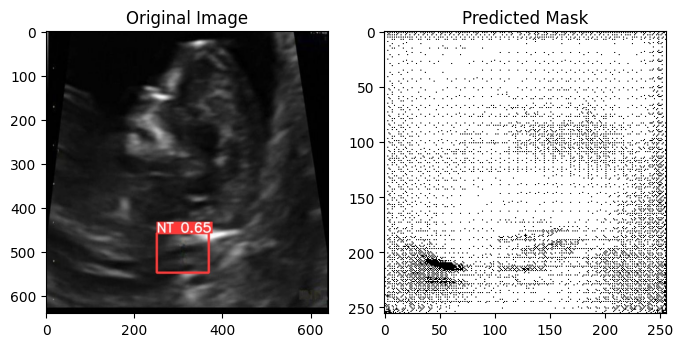

1/1 [==============================] - 1s 550ms/step


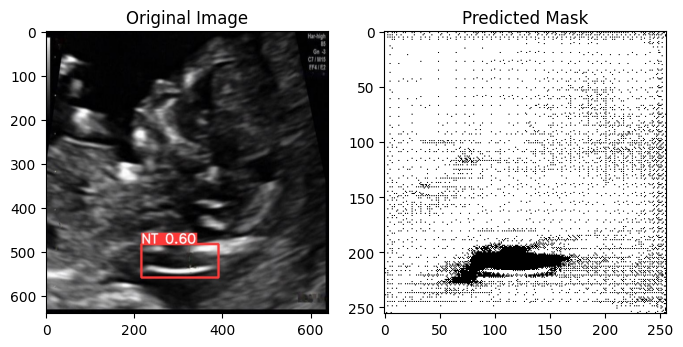

1/1 [==============================] - 1s 507ms/step


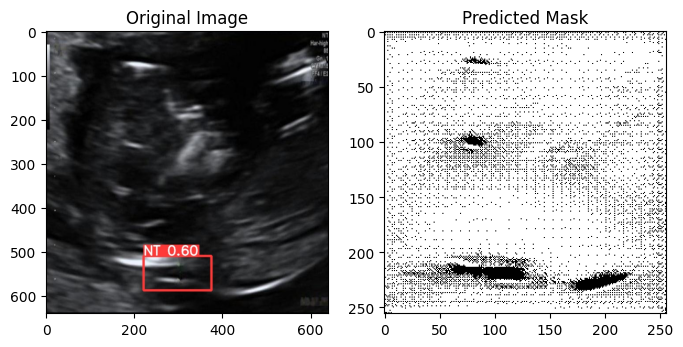

In [68]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
model = load_model('unet-8-256x256-28Jan-99%.h5')

test_folder = 'Test'
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 256))  
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)
    return img

for filename in os.listdir(test_folder)[:10]:
    if filename.endswith(".jpg"):  
        img_path = os.path.join(test_folder, filename)

        # Preprocess the image
        preprocessed_img = preprocess_image(img_path)
        predictions = model.predict(preprocessed_img)
        segmented_mask = (predictions > 0.5).astype(np.uint8)
        plt.figure(figsize=(8, 4))

        # Original Image
        plt.subplot(1, 2, 1)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        # Predicted Mask
        plt.subplot(1, 2, 2)
        plt.imshow(segmented_mask[0, :, :, 0], cmap='gray')  
        plt.title('Predicted Mask')
        plt.show()
